Импорт нужных библиотек для математики и работы с csv 

In [83]:
import pandas as pd
import numpy as np

In [84]:
from matplotlib import pyplot as plt

Получение данных

In [85]:
df = pd.read_csv('C:\\Users\\mvideo\\PycharmProjects\\AI_labs\\resources\\Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Произведем кодирование категориальных признаков

In [86]:
ex_count = len(df['Extracurricular Activities'])

df['Extracurricular Activities'] = np.where((df["Extracurricular Activities"] == "Yes"), 1, df["Extracurricular Activities"])
df['Extracurricular Activities'] = np.where((df["Extracurricular Activities"] == "No"), 0, df["Extracurricular Activities"])

df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Визуализация данных

In [87]:
for col_name, params in df.items():
    count = len(params)
    mean = sum(params) / count
    min_value = min(params)
    max_value = max(params)
    
    # Рассчитаем стандартное отклонение σ = √(Σ(xi - x̄)^2 / (n - 1))
    denominator = count - 1
    numerator = 0
    for value in params:
        numerator += (value - mean)**2
    standard_deviation = (numerator / denominator)**(1/2)
    
    # Расчёт квантилей
    
    # Квантиль - это число, которое разделяет упорядоченную выборку на две части, так,
    # что определенная доля значений находится в каждой из них.
    sorted_params = sorted(params)
    q25 = None
    q50 = None
    q75 = None
    tmp_count = 0
    for val in sorted_params:
        tmp_count += 1
        if q25 is None and tmp_count / count > 0.25:
            q25 = val
        if q50 is None and tmp_count / count > 0.50:
            q50 = val
        if q75 is None and tmp_count / count > 0.75:
            q75 = val
            break
            
    # Вывод данных для колонки
    print("Название столбца: ", col_name)
    print("Среднее значение: ", mean)
    print("Максимальное значение: ", max_value)
    print("Минимальное значение: ", min_value)
    print("Стандартное отклонение: ", standard_deviation)
    print("Квантиль 0.25: ", q25)
    print("Квантиль 0.50: ", q50)
    print("Квантиль 0.75: ", q75)
    print("")

Название столбца:  Hours Studied
Среднее значение:  4.9929
Максимальное значение:  9
Минимальное значение:  1
Стандартное отклонение:  2.589308796185612
Квантиль 0.25:  3
Квантиль 0.50:  5
Квантиль 0.75:  7

Название столбца:  Previous Scores
Среднее значение:  69.4457
Максимальное значение:  99
Минимальное значение:  40
Стандартное отклонение:  17.343152251047066
Квантиль 0.25:  54
Квантиль 0.50:  69
Квантиль 0.75:  85

Название столбца:  Extracurricular Activities
Среднее значение:  0.4948
Максимальное значение:  1
Минимальное значение:  0
Стандартное отклонение:  0.49999795979182254
Квантиль 0.25:  0
Квантиль 0.50:  0
Квантиль 0.75:  1

Название столбца:  Sleep Hours
Среднее значение:  6.5306
Максимальное значение:  9
Минимальное значение:  4
Стандартное отклонение:  1.6958629765176023
Квантиль 0.25:  5
Квантиль 0.50:  7
Квантиль 0.75:  8

Название столбца:  Sample Question Papers Practiced
Среднее значение:  4.5833
Максимальное значение:  9
Минимальное значение:  0
Стандартное откл

In [88]:
df.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


Проверка отсутствующих значений

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int32  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 429.8 KB


In [90]:
df.shape

(10000, 6)

In [91]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Hours Studied
Hours Studied
False    10000
Name: count, dtype: int64
 
Previous Scores
Previous Scores
False    10000
Name: count, dtype: int64
 
Extracurricular Activities
Extracurricular Activities
False    10000
Name: count, dtype: int64
 
Sleep Hours
Sleep Hours
False    10000
Name: count, dtype: int64
 
Sample Question Papers Practiced
Sample Question Papers Practiced
False    10000
Name: count, dtype: int64
 
Performance Index
Performance Index
False    10000
Name: count, dtype: int64
 


In [92]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Отсутствующие значения не найдены

Нормировка данных

Разделим данные на независимые переменные и целевой атрибут
Performance Index - целевой атрибут, остальные - независимые переменные

In [93]:
X = df.drop('Performance Index', axis=1)
Y = df['Performance Index']

Визуализация распределения данных

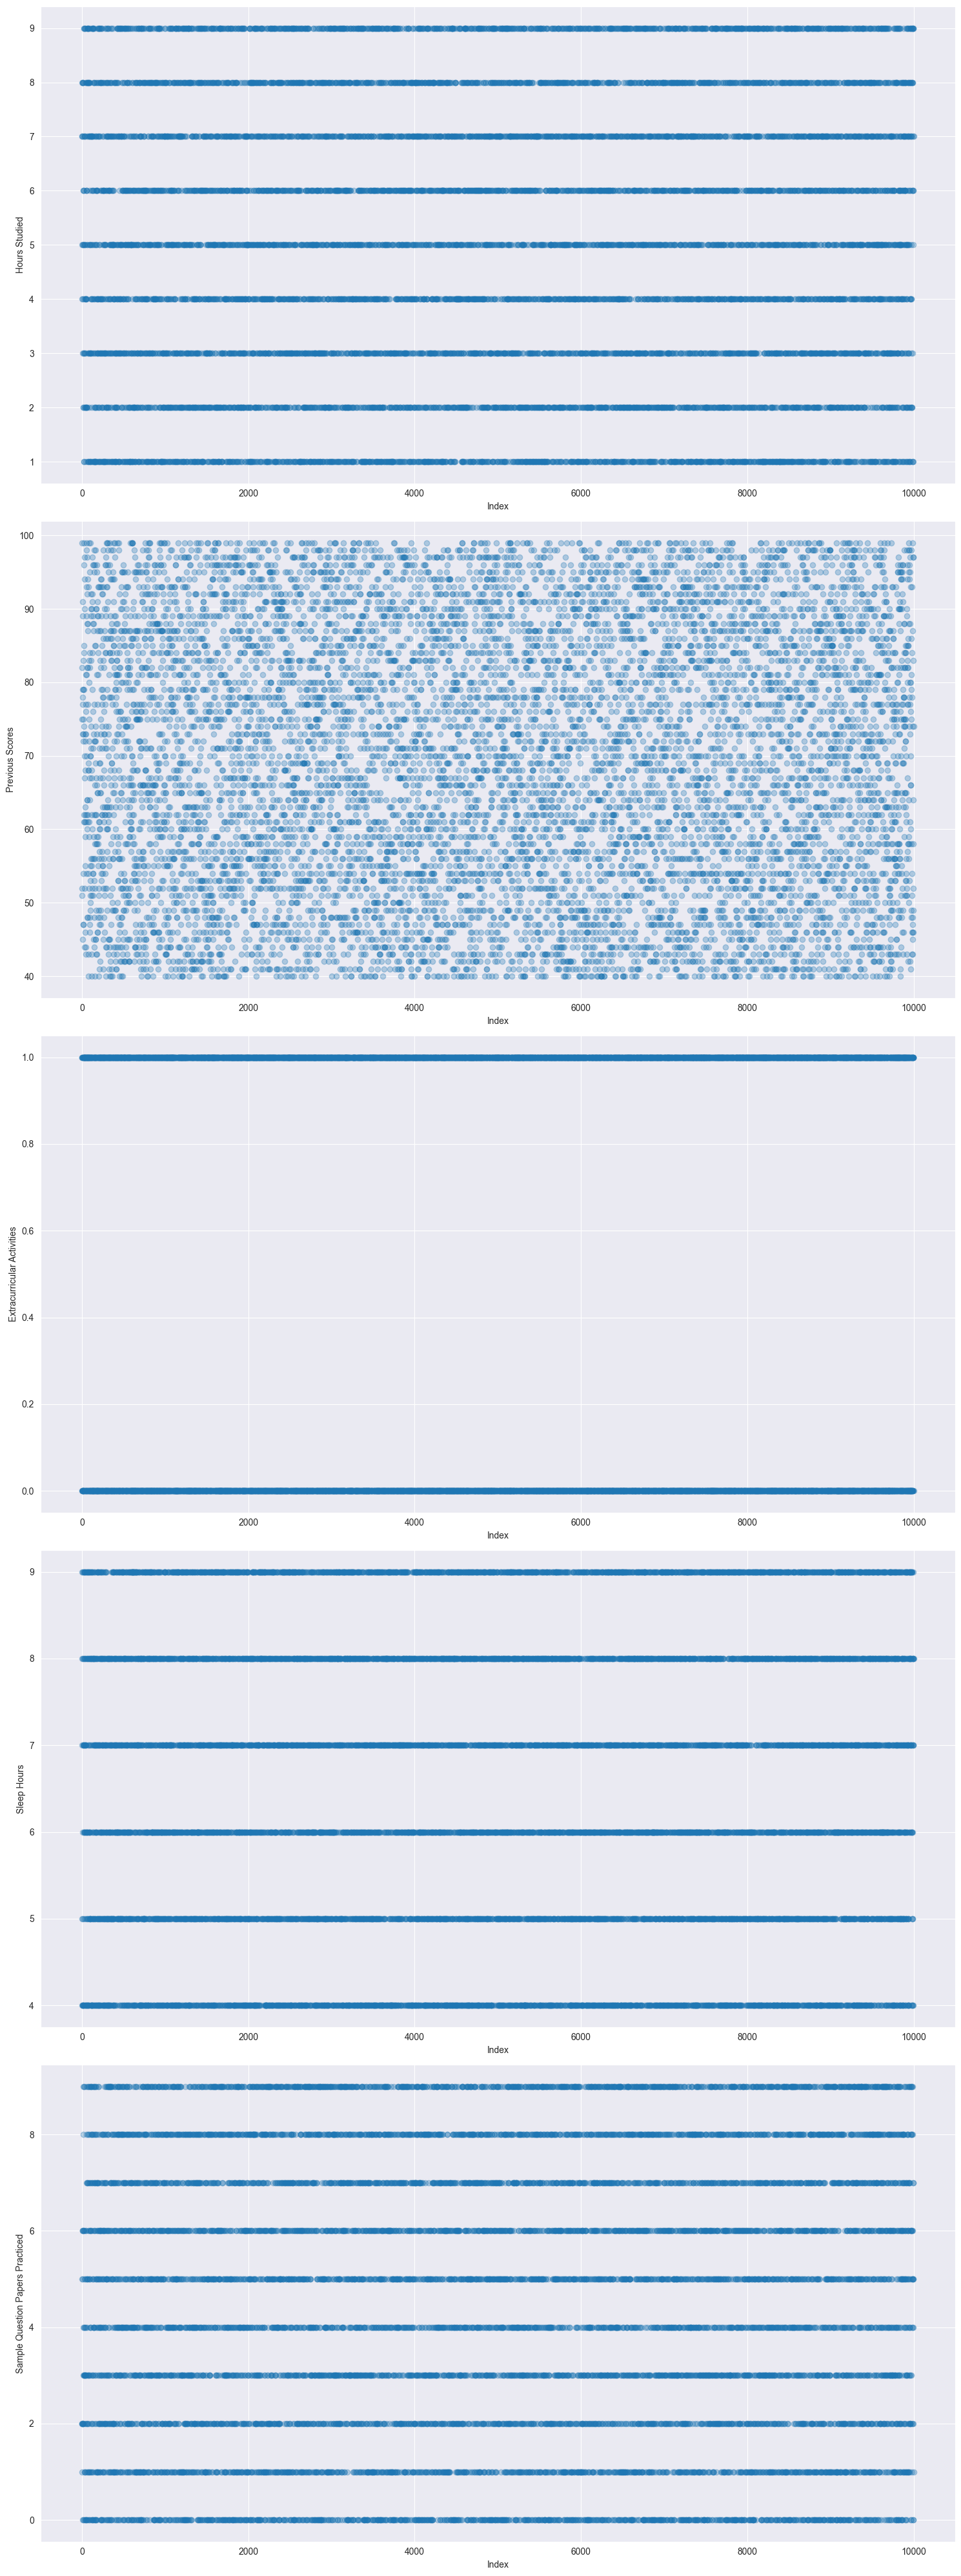

In [94]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Нормировка min max

In [95]:
for column_name, params in X.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X[column_name] = (X[column_name] - minimum) / difference

Визуализация после нормировки

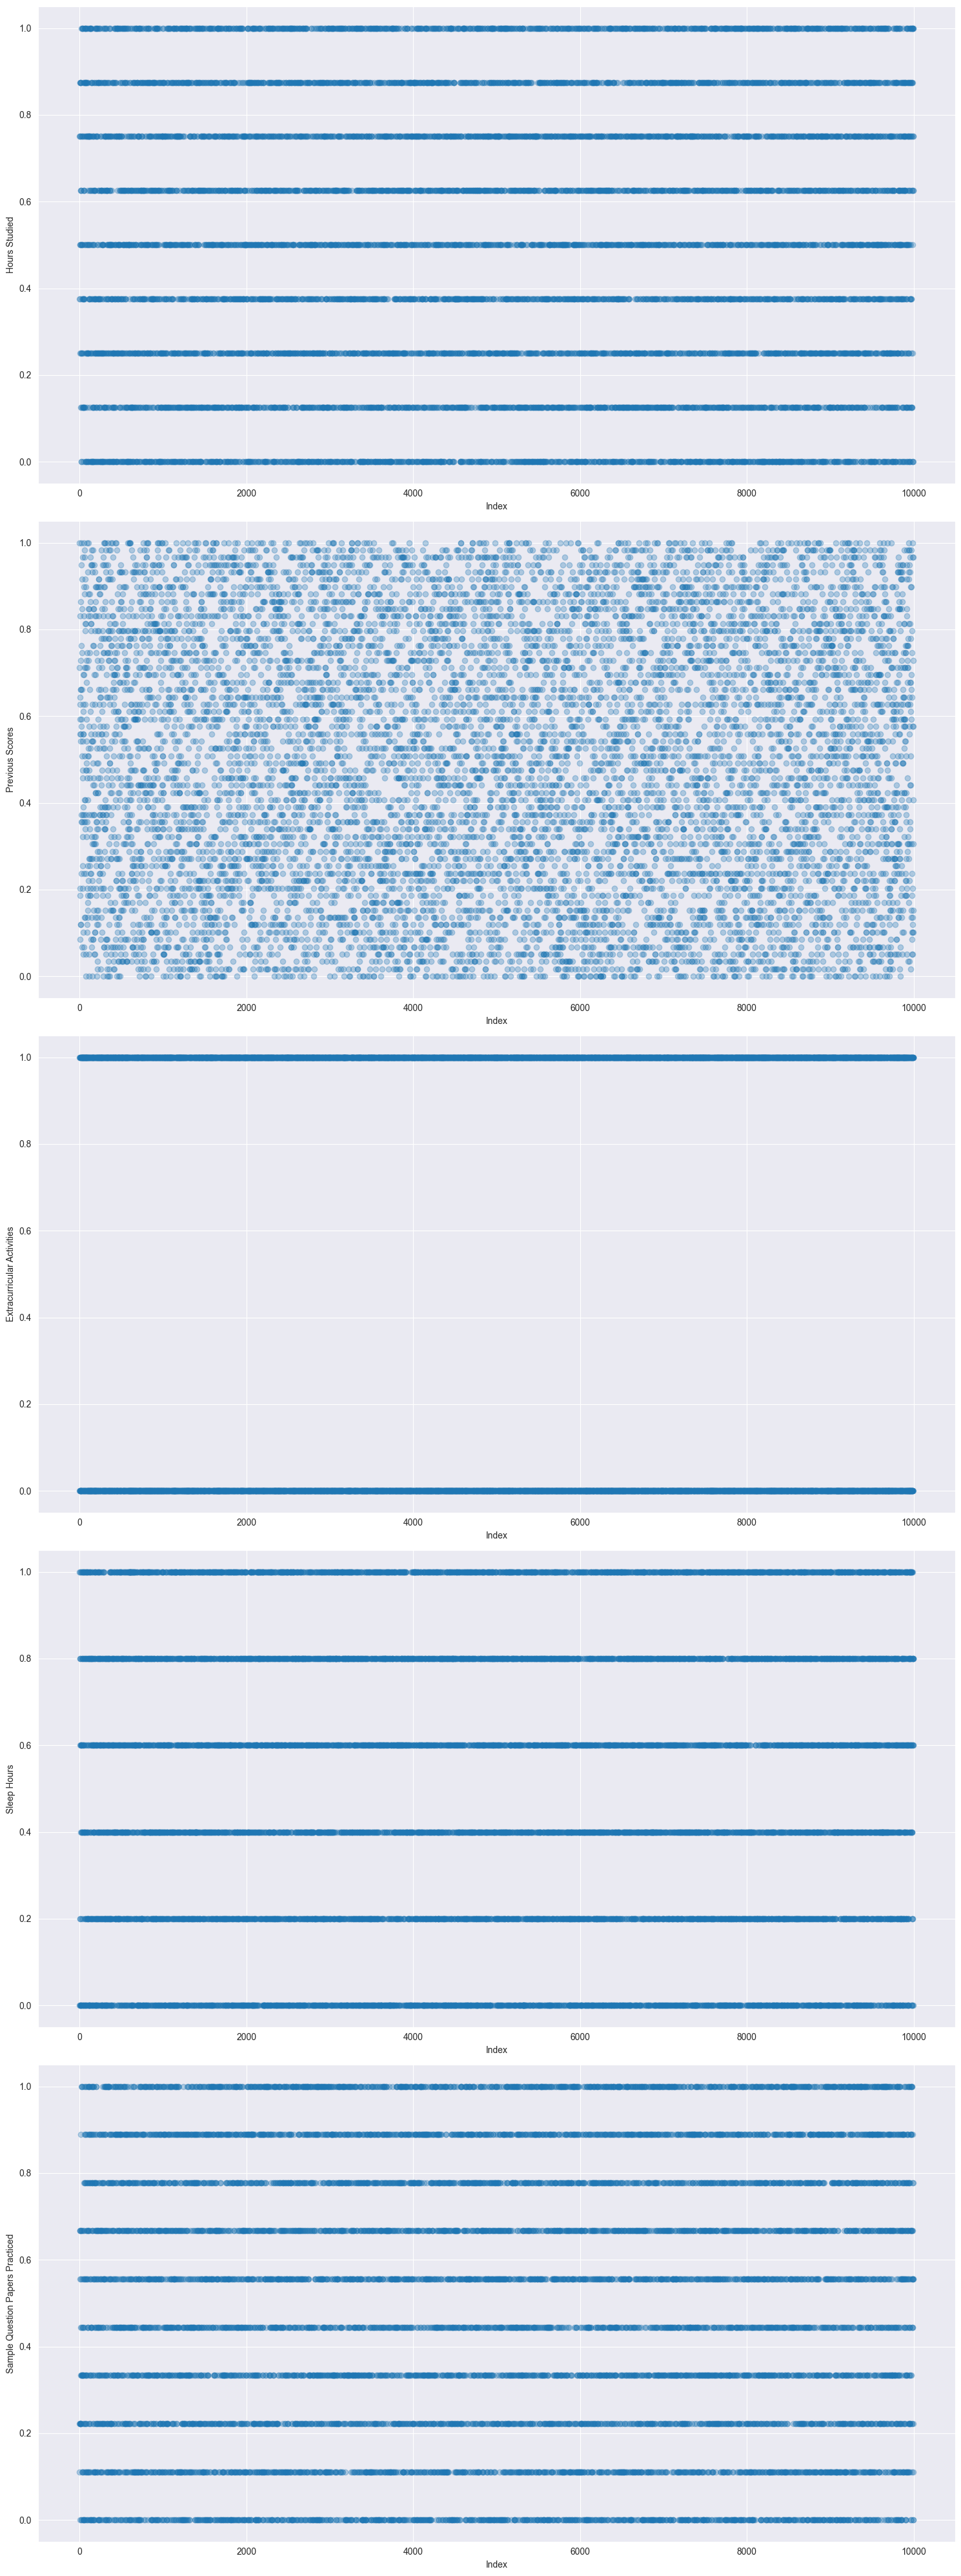

In [96]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [97]:
# Коэффициент Пирсона
X.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000


<Axes: xlabel='Sleep Hours'>

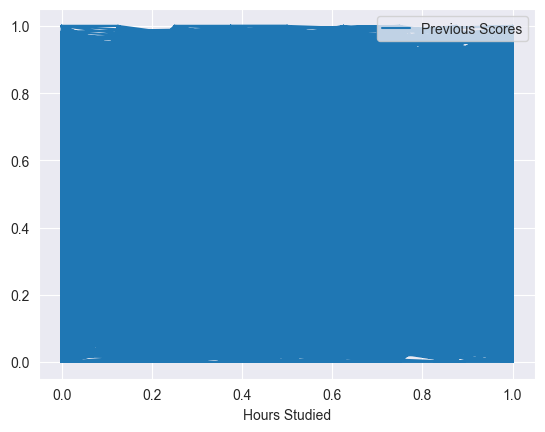

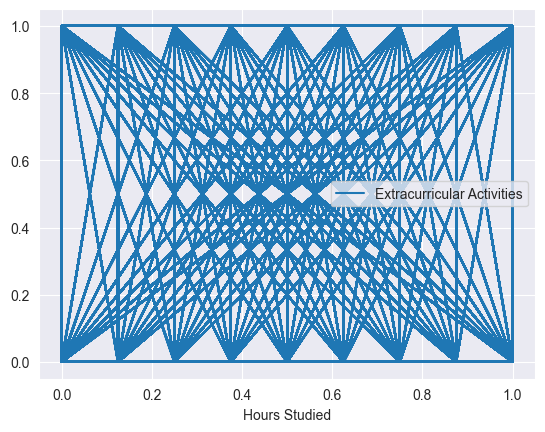

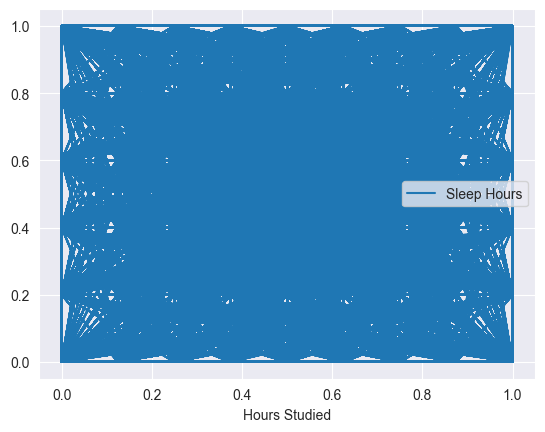

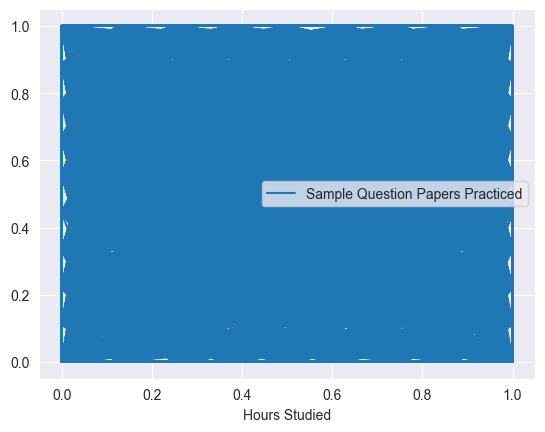

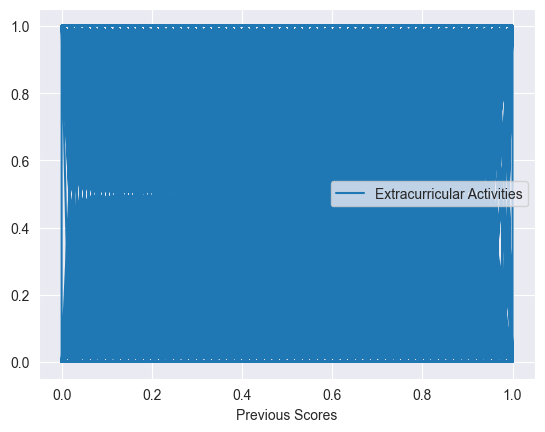

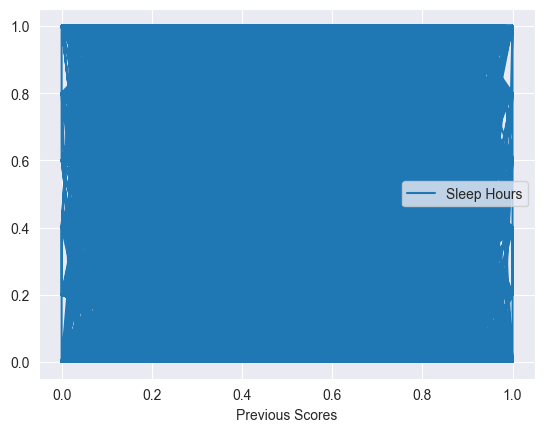

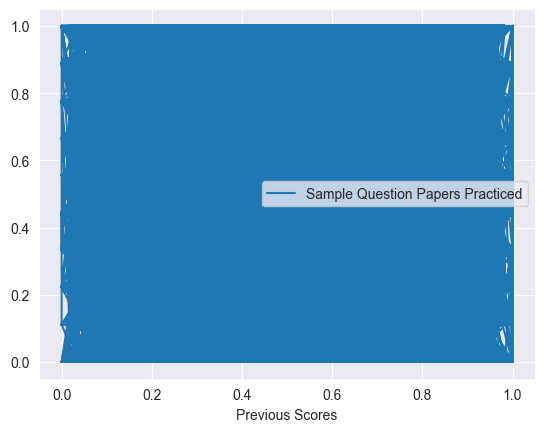

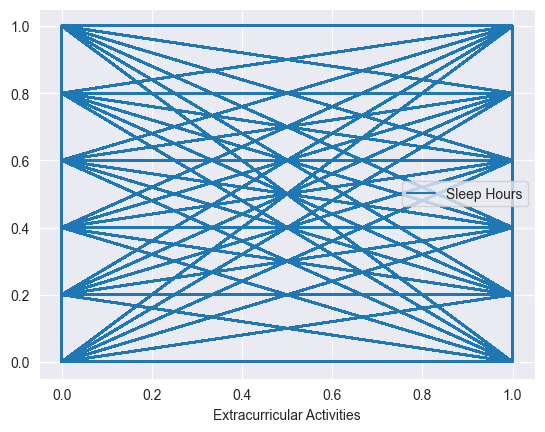

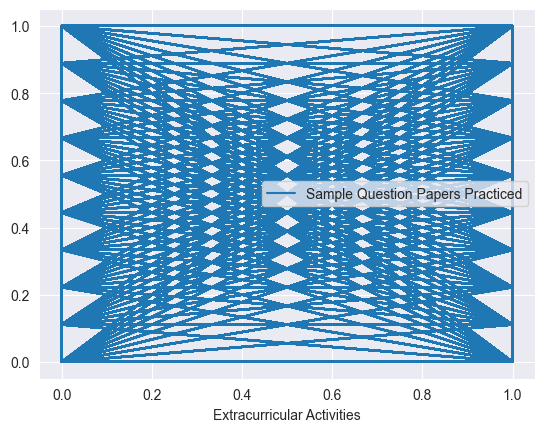

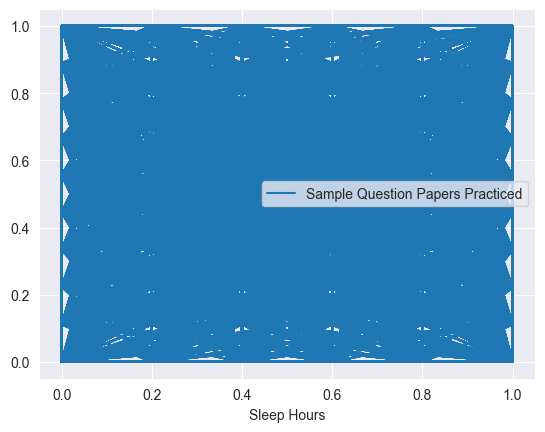

In [98]:
X.plot(x="Hours Studied", y="Previous Scores")
X.plot(x="Hours Studied", y="Extracurricular Activities")
X.plot(x="Hours Studied", y="Sleep Hours")
X.plot(x="Hours Studied", y="Sample Question Papers Practiced")
X.plot(x="Previous Scores", y="Extracurricular Activities")
X.plot(x="Previous Scores", y="Sleep Hours")
X.plot(x="Previous Scores", y="Sample Question Papers Practiced")
X.plot(x="Extracurricular Activities", y="Sleep Hours")
X.plot(x="Extracurricular Activities", y="Sample Question Papers Practiced")
X.plot(x="Sleep Hours", y="Sample Question Papers Practiced")

Реализация линейной регрессии

In [99]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.750,1.000000,1.0,1.0,0.111111
1,0.375,0.711864,0.0,0.0,0.222222
2,0.875,0.186441,1.0,0.6,0.222222
3,0.500,0.203390,1.0,0.2,0.222222
4,0.750,0.593220,0.0,0.8,0.555556
...,...,...,...,...,...
9995,0.000,0.152542,1.0,0.0,0.222222
9996,0.750,0.406780,1.0,0.8,0.555556
9997,0.625,0.728814,1.0,0.8,0.555556
9998,1.000,0.966102,1.0,0.6,0.000000


In [100]:
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Разделим данные на тренировочную и обучающую выборку

In [101]:
import random
indexes = list(range(len(X)))
test_size = 0.2
random.seed(42)
random.shuffle(indexes)
split_index = int(len(X) * test_size)

X_train = X.iloc[indexes[split_index:]]
X_test = X.iloc[indexes[:split_index]]
Y_train = Y.iloc[indexes[split_index:]]
Y_test = Y.iloc[indexes[:split_index]]

In [102]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1518,0.875,0.728814,1.0,0.6,0.888889
3059,0.625,0.966102,0.0,1.0,0.111111
4585,0.250,0.711864,0.0,0.0,0.111111
7120,0.375,0.067797,0.0,0.0,0.000000
3622,0.625,0.355932,0.0,0.6,0.666667
...,...,...,...,...,...
3657,0.750,0.152542,0.0,0.6,0.777778
4012,0.875,0.152542,0.0,1.0,0.888889
4506,0.500,0.016949,1.0,0.8,0.666667
409,0.250,0.677966,0.0,0.6,0.333333


In [103]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
3771,0.875,0.322034,1.0,1.0,0.888889
6672,0.000,0.830508,0.0,0.8,0.888889
7261,0.750,0.101695,0.0,0.6,0.444444
760,0.625,0.067797,0.0,1.0,0.888889
3779,0.375,0.576271,0.0,0.6,0.777778
...,...,...,...,...,...
335,0.500,0.949153,1.0,0.0,0.666667
591,0.500,0.338983,0.0,1.0,0.000000
906,1.000,0.949153,1.0,0.2,0.888889
2056,0.375,0.881356,0.0,1.0,0.000000


In [104]:
Y_train

1518    79.0
3059    86.0
4585    64.0
7120    25.0
3622    50.0
        ... 
3657    39.0
4012    42.0
4506    26.0
409     59.0
1824    89.0
Name: Performance Index, Length: 8000, dtype: float64

In [105]:
Y_test

3771    55.0
6672    66.0
7261    37.0
760     35.0
3779    56.0
        ... 
335     82.0
591     49.0
906     96.0
2056    73.0
5230    61.0
Name: Performance Index, Length: 2000, dtype: float64

Приведем к матричному виду

In [106]:
X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.values]
X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.values]
Y_train_matrix = Y_train.values
Y_test_matrix = Y_test.values

In [107]:
X_train_matrix

array([[1.        , 0.875     , 0.72881356, 1.        , 0.6       ,
        0.88888889],
       [1.        , 0.625     , 0.96610169, 0.        , 1.        ,
        0.11111111],
       [1.        , 0.25      , 0.71186441, 0.        , 0.        ,
        0.11111111],
       ...,
       [1.        , 0.5       , 0.01694915, 1.        , 0.8       ,
        0.66666667],
       [1.        , 0.25      , 0.6779661 , 0.        , 0.6       ,
        0.33333333],
       [1.        , 0.625     , 0.96610169, 0.        , 1.        ,
        0.33333333]])

In [108]:
X_test_matrix

array([[1.        , 0.875     , 0.3220339 , 1.        , 1.        ,
        0.88888889],
       [1.        , 0.        , 0.83050847, 0.        , 0.8       ,
        0.88888889],
       [1.        , 0.75      , 0.10169492, 0.        , 0.6       ,
        0.44444444],
       ...,
       [1.        , 1.        , 0.94915254, 1.        , 0.2       ,
        0.88888889],
       [1.        , 0.375     , 0.88135593, 0.        , 1.        ,
        0.        ],
       [1.        , 0.875     , 0.49152542, 1.        , 0.        ,
        0.55555556]])

In [109]:
Y_train_matrix

array([79., 86., 64., ..., 26., 59., 89.])

In [110]:
Y_test_matrix

array([55., 66., 37., ..., 96., 73., 61.])

В данном случае мы имеем дело с большим объемом данных, при этом нет мультиколлинеарности
поэтому используем матричный метод

In [111]:
# Y = BX + e

# B = (X`X)^(-1) X'Y

B = np.dot(np.dot(np.linalg.inv(np.dot(X_train_matrix.transpose(), X_train_matrix)), X_train_matrix.transpose()), Y_train_matrix)
B     

array([11.44332252, 22.82176414, 60.10167206,  0.61481524,  2.40642602,
        1.7077733 ])

In [112]:
matrix_method_prediction = np.dot(X_test_matrix, B)
matrix_method_prediction

array([55.30640387, 64.80143204, 36.87454605, ..., 93.92486266,
       75.37887531, 62.51744416])

Анализ и оценка моделей


Формула для подсчета R2 score выглядит следующим образом:
R2 = 1 - (SS_res / SS_tot)
где:
SS_res - сумма квадратов остатков (разница между фактическими и предсказанными значениями);
SS_tot - общая сумма квадратов (разница между фактическими значениями и средним значением зависимой переменной).

In [113]:
columns = X_train.columns
mean = sum(Y_test.values) / len(Y_test.values)


full_SS_res = sum(np.square(Y_test.values - matrix_method_prediction))
full_SS_tot = sum(np.square(Y_test.values - mean))
r2_score = 1 - (full_SS_res / full_SS_tot)

print("R2 полной таблицы: ", r2_score)
print("")

for i, column in enumerate(columns):
    X_train_matrix = np.c_[np.ones(len(X_train.values)), X_train.drop(column, axis=1).values]
    X_test_matrix = np.c_[np.ones(len(X_test.values)), X_test.drop(column, axis=1).values]
    Y_train_matrix = Y_train.values
    Y_test_matrix = Y_test.values
    
    B = np.dot(np.dot(np.linalg.inv(np.dot(X_train_matrix.transpose(), X_train_matrix)), X_train_matrix.transpose()), Y_train_matrix)
    matrix_method_prediction = np.dot(X_test_matrix, B)
    
    SS_res = sum(np.square(Y_test.values - matrix_method_prediction))
    SS_tot = sum(np.square(Y_test.values - mean))
    
    r2_matrix = 1 - (SS_res / SS_tot)
    
    print("Убрали столбец: ", column)
    print("R2: ", r2_matrix)
    print("Разницы с R2 полной таблицы: ", r2_matrix - r2_score)
    print("")
    
    
    
    

R2 полной таблицы:  0.988663557365881

Убрали столбец:  Hours Studied
R2:  0.83845781274411
Разницы с R2 полной таблицы:  -0.15020574462177094

Убрали столбец:  Previous Scores
R2:  0.1397214754938637
Разницы с R2 полной таблицы:  -0.8489420818720173

Убрали столбец:  Extracurricular Activities
R2:  0.988410646478498
Разницы с R2 полной таблицы:  -0.0002529108873829955

Убрали столбец:  Sleep Hours
R2:  0.9869400299353801
Разницы с R2 полной таблицы:  -0.0017235274305008597

Убрали столбец:  Sample Question Papers Practiced
R2:  0.9876624250109424
Разницы с R2 полной таблицы:  -0.0010011323549385942
